<a href="https://colab.research.google.com/github/shishiradk/ocr-detection/blob/main/Nepali_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nepali OCR detector.

## importing Module

In [1]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 22.1 MB/s eta 0:00:00


In [2]:

import matplotlib.pyplot as plt
import cv2
import easyocr
import numpy as np
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16

## Loading pre trained model.

'ne' for Nepali and 'en' for english and simillary for other

In [3]:
reader = easyocr.Reader(['ne']) #'ne' for Nepali and 'en' for english and simillary for other

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

## Normal image to Scaned image

In [4]:
def map(x, in_min, in_max, out_min, out_max):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

def highPassFilter(img,kSize):
    if not kSize%2:
        kSize +=1
    kernel = np.ones((kSize,kSize),np.float32)/(kSize*kSize)
    filtered = cv2.filter2D(img,-1,kernel)
    filtered = img.astype('float32') - filtered.astype('float32')
    filtered = filtered + 127*np.ones(img.shape, np.uint8)
    filtered = filtered.astype('uint8')
    return filtered

def blackPointSelect(img, blackPoint):
    img = img.astype('int32')
    img = map(img, blackPoint, 255, 0, 255)
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_TOZERO)
    img = img.astype('uint8')
    return img

def whitePointSelect(img,whitePoint):
    _,img = cv2.threshold(img, whitePoint, 255, cv2.THRESH_TRUNC)
    img = img.astype('int32')
    img = map(img, 0, whitePoint, 0, 255)
    img = img.astype('uint8')
    return img

def blackAndWhite(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    (l,a,b) = cv2.split(lab)
    img = cv2.add( cv2.subtract(l,b), cv2.subtract(l,a) )
    return img
def scan_effect(img):

    blackPoint = 66
    whitePoint = 130
    image = highPassFilter(img,kSize = 51)
    image_white = whitePointSelect(image, whitePoint)
    img_black = blackPointSelect(image_white, blackPoint)
    image=blackPointSelect(img,blackPoint)
    white = whitePointSelect(image,whitePoint)
    img_black = blackAndWhite(white)
    return img_black



> Enter the location of image file

In [5]:
loc="nepalitext.jpg"

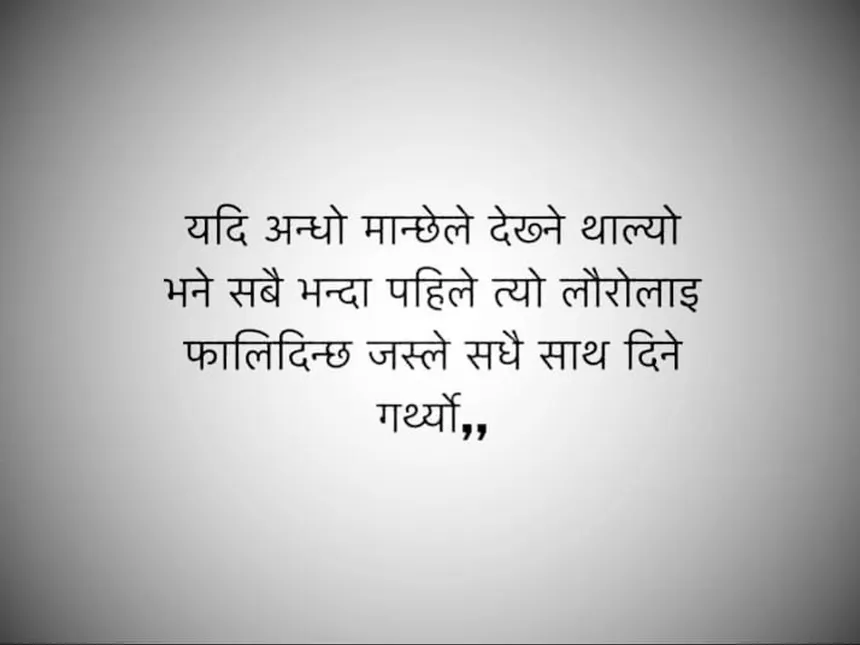

In [6]:

Image(loc)

In [7]:
img = cv2.imread(loc)
image = scan_effect(img)
#from google.colab.patches import cv2_imshow
#cv2_imshow(image)
filename = 'scanned.jpg'
cv2.imwrite(filename, image)

True

## Loading Image

In [8]:
path=filename

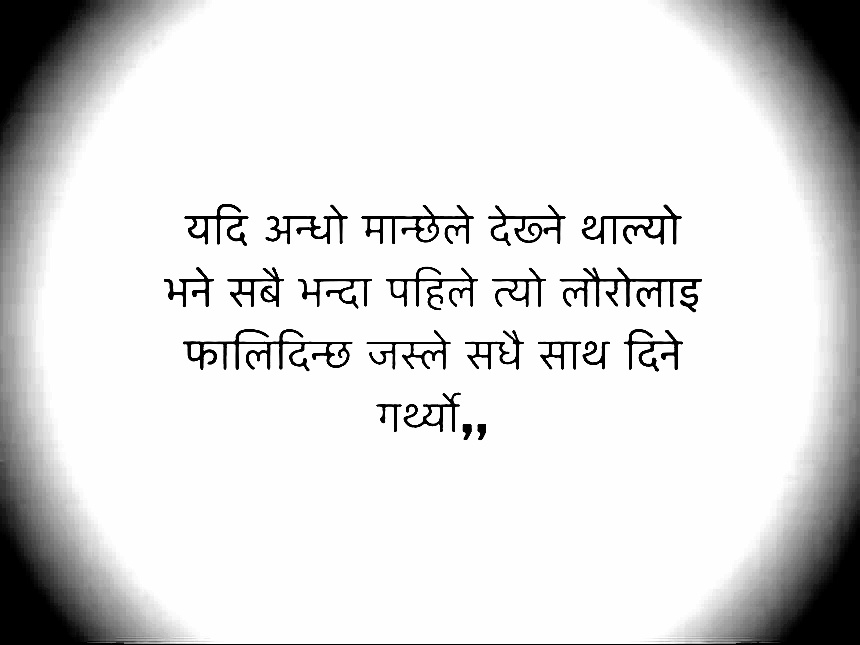

In [9]:

Image(path)

## Detecting character from image

In [10]:
output = reader.readtext(path)

## Output

In [11]:
output

[([[np.int32(178), np.int32(199)],
   [np.int32(690), np.int32(199)],
   [np.int32(690), np.int32(254)],
   [np.int32(178), np.int32(254)]],
  'यदि अन्धो मान्छेले देख्ने थाल्यो',
  np.float64(0.39440342178466486)),
 ([[np.int32(159), np.int32(259)],
   [np.int32(711), np.int32(259)],
   [np.int32(711), np.int32(321)],
   [np.int32(159), np.int32(321)]],
  'भने सबै भन्दा पहिले त्या लौरोलाइ',
  np.float64(0.5020741861699182)),
 ([[np.int32(177), np.int32(323)],
   [np.int32(692), np.int32(323)],
   [np.int32(692), np.int32(379)],
   [np.int32(177), np.int32(379)]],
  'फालिदिन्छ जस्ले सधै साथ दिने',
  np.float64(0.47666093921038183)),
 ([[np.int32(369), np.int32(387)],
   [np.int32(495), np.int32(387)],
   [np.int32(495), np.int32(447)],
   [np.int32(369), np.int32(447)]],
  'गर्थ्यो,,',
  np.float64(0.8624762868757623))]

## Total detection

In [12]:
print(f'Total number of detection',len(output))

Total number of detection 4


## Previewing Output

यदि अन्धो मान्छेले देख्ने थाल्यो
भने सबै भन्दा पहिले त्या लौरोलाइ
फालिदिन्छ जस्ले सधै साथ दिने
गर्थ्यो,,


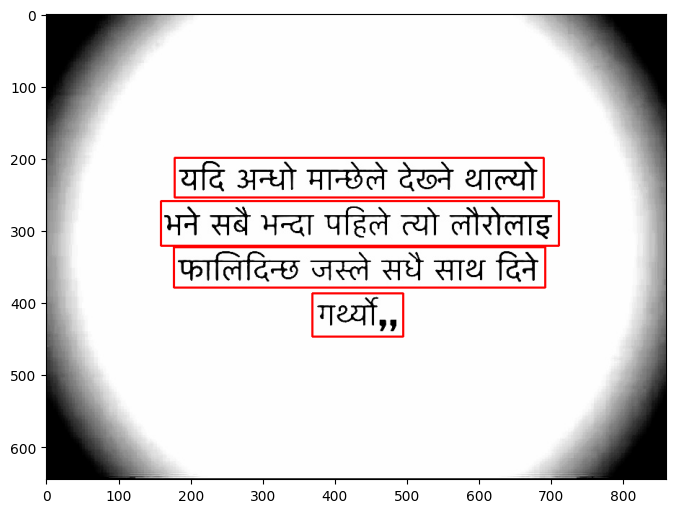

In [13]:
image = cv2.imread(path)
for i in range(len(output)):
  cord = output[i][0]
  x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
  x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
  cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
  print(output[i][1])

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))